0                              Metabolism of vitamin K
1                          Arachidonic acid metabolism
2                                     Wax biosynthesis
3                                    Purine catabolism
4                                        Adrenoceptors
                             ...                      
10824                   Phase 0 - rapid depolarisation
10825    Metabolism of Angiotensinogen to Angiotensins
10826                 Peptide ligand-binding receptors
10827                   Phase 0 - rapid depolarisation
10828                          Phase 2 - plateau phase
Name: pathwayname, Length: 10829, dtype: object
Pick a number for Pathway90
you have selected : Biosynthesis of maresin-like SPMs


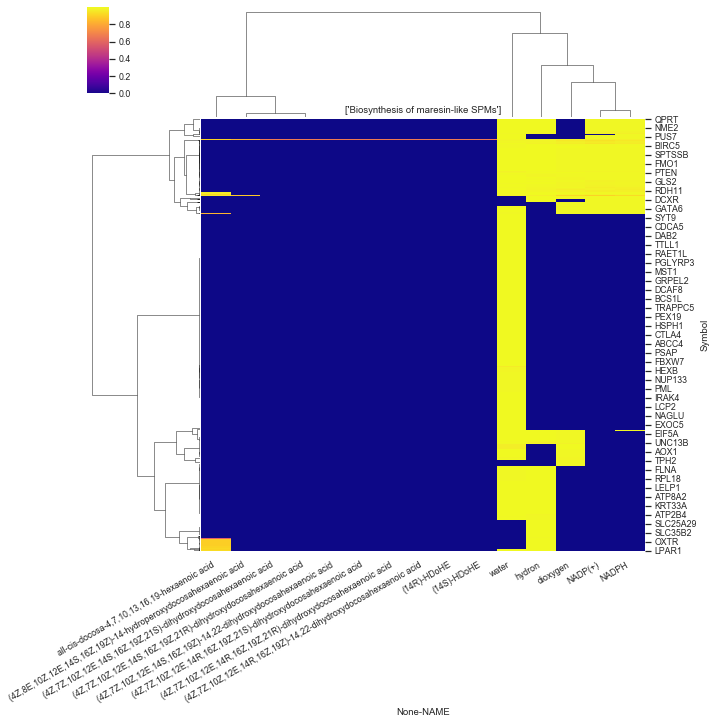

<Figure size 432x288 with 0 Axes>

In [131]:
import pandas as pd
from sklearn.cluster import AgglomerativeClustering as AC
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as hc
from scipy.cluster.hierarchy import ward,fcluster,is_valid_linkage
import seaborn as sns; sns.set(color_codes=True)

#data from Jaccard script with gene symbols,chebi compound names and Jaccard similairty scores
score_df= pd.read_csv("/Users/anu/Desktop/pathway_score.csv", sep = ',')

#joining the corresponding chebi and gene names with the Id's

chebinames = pd.read_csv("/Users/anu/Desktop/compounds.tsv",sep = '\t',usecols = ['CHEBI_ACCESSION','NAME'])
genenames = pd.read_csv("/Users/anu/Desktop/gene_info.csv",usecols = ['GeneID','Symbol'])

#Joining dataframes
score_chebi= score_df.join(chebinames.set_index('CHEBI_ACCESSION'), on='chebi_id')
finaldf = score_chebi.join(genenames.set_index('GeneID'),on= 'GeneID')

#reading lowest level reactome pathway data
reactome = pd.read_csv("/Users/anu/Desktop/KBJacc_Scorefiles/chebi2Reactome.csv",usecols=['chebi_id','reactomepathway_id','pathwayname'])

# To generate pathway list for the user
pick_pathway =[]
def index(file,col):
    items = file[col]
    print(items)
    user = input("Pick a number for Pathway")
    pick = int(user)
    print("you have selected :", items[pick])
    pick_pathway.append(items[pick])
    return(items[pick])

    
def generator(df1,colname):
    info = index(df1,colname)
    select = df1.loc[df1[colname]==info]
    return(select["chebi_id"])  

def matrix(df1,colname,df2,col3,col4):
    collection = generator(df1,colname)
    selection = pd.DataFrame(collection)
    df3 = selection.join(df2.set_index('chebi_id'),on = 'chebi_id')
    df3["Jaccard_Distance"] = 1-df3[col4]
    matrixx = df3.pivot_table(index = ["Symbol"],values = ['Jaccard_Distance'],columns =['NAME'],aggfunc=sum,fill_value=0.0)
    return(matrixx)

clust = matrix(reactome,'pathwayname',finaldf,"chebi_id",'Jaccard_Similarity_Score')

# Heatmap Dendogram :::
symbls = clust.index
sns.set(font_scale = .8)
g = sns.clustermap(clust,
                   method = 'ward',
                   metric = 'euclidean',
                   cmap ='plasma',
                   xticklabels=[x[1] for x in clust.columns],
                   figsize = (10,10)
)
g.ax_heatmap.set_title(pick_pathway)
plt.setp(g.ax_heatmap.get_xticklabels(), ha='right', rotation= 30)# angle the x axis labels
# plt.setp(g.ax_heatmap.get_yticklabels(), rotation= 0)# angle the y axis labels
# plt.setp(g.ax.heatmap.invert_axes())
# plt.plot(range(10),range(10), "o")
f=plt.figure()
plt.show(g)
# print(f.savefig("/Users/anu/Desktop/PEP_Lev1/df.pdf"))
